In [1]:
#  analyisis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# ML
import lightgbm as lgb

In [2]:
# 读取数据
train_data = pd.read_csv("round1_ijcai_18_train_20180301.txt", sep=" ")
test_data = pd.read_csv("round1_ijcai_18_test_a_20180301.txt", sep=" ")


In [3]:
print(train_data.columns)
train_data.columns.isin(test_data.columns)

Index(['instance_id', 'item_id', 'item_category_list', 'item_property_list',
       'item_brand_id', 'item_city_id', 'item_price_level', 'item_sales_level',
       'item_collected_level', 'item_pv_level', 'user_id', 'user_gender_id',
       'user_age_level', 'user_occupation_id', 'user_star_level', 'context_id',
       'context_timestamp', 'context_page_id', 'predict_category_property',
       'shop_id', 'shop_review_num_level', 'shop_review_positive_rate',
       'shop_star_level', 'shop_score_service', 'shop_score_delivery',
       'shop_score_description', 'is_trade'],
      dtype='object')


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False], dtype=bool)

In [4]:
train_data.describe()

,instance_id,item_id,item_brand_id,item_city_id,item_price_level,item_sales_level,item_collected_level,item_pv_level,user_id,user_gender_id,...,context_timestamp,context_page_id,shop_id,shop_review_num_level,shop_review_positive_rate,shop_star_level,shop_score_service,shop_score_delivery,shop_score_description,is_trade
count,4.781380e+05,4.781380e+05,4.781380e+05,4.781380e+05,478138.000000,478138.00000,478138.000000,478138.000000,4.781380e+05,478138.000000,...,4.781380e+05,478138.000000,4.781380e+05,478138.000000,478138.000000,478138.000000,478138.000000,478138.000000,478138.000000,478138.000000
mean,4.613082e+18,4.594622e+18,4.838444e+18,5.500420e+18,6.777175,11.13384,12.199336,17.128676,4.609864e+18,0.213047,...,1.537502e+09,4003.362366,4.733842e+18,15.768353,0.994830,5013.175240,0.971124,0.970497,0.974863,0.018867
std,2.663448e+18,2.710140e+18,2.694756e+18,2.464881e+18,1.089037,2.58886,2.497312,2.160745,2.663355e+18,0.514699,...,1.726222e+05,4.019709,2.596118e+18,2.825294,0.011972,2.590989,0.023817,0.023776,0.025024,0.136055
min,3.823219e+12,6.964907e+14,-1.000000e+00,-1.000000e+00,0.000000,-1.00000,0.000000,0.000000,2.477979e+13,-1.000000,...,1.537200e+09,4001.000000,1.543560e+15,0.000000,-1.000000,4999.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2.308543e+18,2.251088e+18,2.357806e+18,3.948283e+18,6.000000,10.00000,11.000000,16.000000,2.302761e+18,0.000000,...,1.537351e+09,4001.000000,2.498543e+18,14.000000,0.992779,5012.000000,0.966360,0.965684,0.969268,0.000000
50%,4.613478e+18,4.636270e+18,5.051040e+18,6.738284e+18,7.000000,11.00000,12.000000,17.000000,4.608490e+18,0.000000,...,1.537506e+09,4001.000000,4.629590e+18,16.000000,1.000000,5013.000000,0.972347,0.971590,0.978493,0.000000
75%,6.920994e+18,7.007158e+18,7.565625e+18,7.534239e+18,8.000000,13.00000,14.000000,19.000000,6.914375e+18,0.000000,...,1.537635e+09,4004.000000,6.740687e+18,17.000000,1.000000,5015.000000,0.977822,0.976978,0.983640,0.000000
max,9.223362e+18,9.221980e+18,9.222396e+18,9.151271e+18,17.000000,17.00000,17.000000,21.000000,9.223345e+18,2.000000,...,1.537805e+09,4020.000000,9.220773e+18,25.000000,1.000000,5020.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# 替换空值
none_list = ['item_brand_id','item_city_id','item_sales_level','user_age_level','user_occupation_id','user_star_level','user_gender_id','shop_review_positive_rate','shop_score_service','shop_score_delivery','shop_score_description']
for label in none_list:
    train_data = train_data.replace({label: -1},train_data[label].median())#mean()
    train_data = train_data.replace({label:-1},train_data[label].median())

for label in none_list:
    test_data = test_data.replace({label: -1},test_data[label].median())#mean()
    test_data = test_data.replace({label:-1},test_data[label].median())
    
train_data.drop_duplicates(inplace=True)#默认为所有行相同去重，也可以指定列下去重
print("训练数据集大小：",train_data.shape)
print("测试数据集大小：",test_data.shape)
# #训练+测试集合并
# total_data = train_data.append(test_data, ignore_index=True)
# #拆分（特征工程完成后做）
# train_number = train_data.shape[0]
# train_data = total_data.loc[:train_number-1,:]
# test_data = total_data.loc[train_number:,:]
# del test_data['is_trade']

训练数据集大小： (478111, 27)
测试数据集大小： (18371, 26)


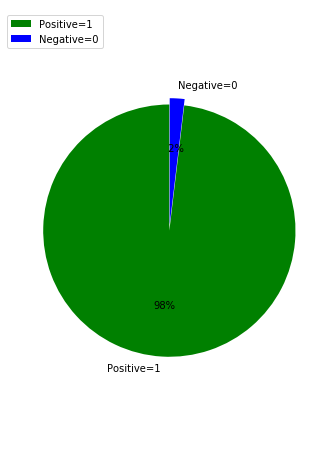

In [6]:
#看样本比例
plt.figure(figsize=(5,8))
labels = [u'Positive=1',u'Negative=0']
sizes = [469117 / 478138, 9021/ 478138]
colors = ['green', 'blue']
explode = (0.05, 0)#伸出来的那部分比例
patches, l_text, p_text = plt.pie(sizes, explode=explode, labels=labels, colors=colors,
                                       labeldistance=1.1, autopct='%2.0f%%', shadow=False,
                                       startangle=90, pctdistance=0.6)
# labeldistance，文本的位置离圆心有多远，1.1指1.1倍半径的位置
# autopct，圆里面的文本格式，%3.1f%%表示小数有三位，整数有一位的浮点数
# shadow，饼是否有阴影
# startangle，起始角度，0，表示从0开始逆时针转，为第一块。一般选择从90度开始比较好看
# pctdistance，百分比的text离圆心的距离
# patches, l_texts, p_texts，为了得到饼图的返回值，p_texts饼图内部文本的，l_texts饼图外label的文本
for t in l_text:
    t.set_size = 30
for t in p_text:
    t.set_size = 30
plt.axis('equal')#画圆
plt.legend(loc='upper left',bbox_to_anchor=(-0.1, 1))
plt.grid()
plt.show()

In [7]:
train_data.user_gender_id.value_counts()

0    373699
1     94063
2     10349
Name: user_gender_id, dtype: int64

In [8]:
#将user_gender_id属性分割成多个(适合比较少类目的属性)
gender_id_class = pd.get_dummies(train_data.user_gender_id)
gender_class = gender_id_class.rename(columns=lambda x: 'gender_class_'+str(x))
train_data = pd.concat([train_data,gender_class],axis=1)

In [9]:
# train_data.context_page_id = train_data.context_page_id.values - 4000
# train_data.user_age_level = train_data.user_age_level.values - 1000
#中心化
train_data.context_page_id = (train_data['context_page_id'] - train_data['context_page_id'].min())/(train_data['context_page_id'].max() - train_data['context_page_id'].min())
train_data.user_age_level = (train_data['user_age_level'] - train_data['user_age_level'].min())/(train_data['user_age_level'].max() - train_data['user_age_level'].min())

In [10]:
train_data.describe()

,instance_id,item_id,item_brand_id,item_city_id,item_price_level,item_sales_level,item_collected_level,item_pv_level,user_id,user_gender_id,...,shop_review_num_level,shop_review_positive_rate,shop_star_level,shop_score_service,shop_score_delivery,shop_score_description,is_trade,gender_class_0,gender_class_1,gender_class_2
count,4.781110e+05,4.781110e+05,4.781110e+05,4.781110e+05,478111.000000,478111.000000,478111.000000,478111.000000,4.781110e+05,478111.000000,...,478111.000000,478111.000000,478111.000000,478111.000000,478111.000000,478111.000000,478111.000000,478111.000000,478111.000000,478111.000000
mean,4.613058e+18,4.594616e+18,4.834326e+18,5.499039e+18,6.777242,11.156656,12.199288,17.128648,4.609870e+18,0.240030,...,15.768296,0.994859,5013.175187,0.971367,0.970740,0.975108,0.018812,0.781616,0.196739,0.021646
std,2.663453e+18,2.710124e+18,2.705357e+18,2.468794e+18,1.088979,2.533900,2.497317,2.160771,2.663365e+18,0.475087,...,2.825281,0.009223,2.590979,0.009369,0.009281,0.012037,0.135859,0.413150,0.397534,0.145524
min,3.823219e+12,6.964907e+14,-4.172332e+18,-2.485089e+18,0.000000,1.000000,0.000000,0.000000,2.477979e+13,0.000000,...,0.000000,0.714286,4999.000000,0.786667,0.830000,0.786667,0.000000,0.000000,0.000000,0.000000
25%,2.308539e+18,2.251088e+18,2.357806e+18,3.948283e+18,6.000000,10.000000,11.000000,16.000000,2.302746e+18,0.000000,...,14.000000,0.992779,5012.000000,0.966363,0.965684,0.969289,0.000000,1.000000,0.000000,0.000000
50%,4.613362e+18,4.636270e+18,5.051040e+18,6.738284e+18,7.000000,11.000000,12.000000,17.000000,4.608564e+18,0.000000,...,16.000000,1.000000,5013.000000,0.972347,0.971590,0.978493,0.000000,1.000000,0.000000,0.000000
75%,6.920942e+18,7.007158e+18,7.565625e+18,7.534239e+18,8.000000,13.000000,14.000000,19.000000,6.914401e+18,0.000000,...,17.000000,1.000000,5015.000000,0.977822,0.976978,0.983640,0.000000,1.000000,0.000000,0.000000
max,9.223362e+18,9.221980e+18,9.222396e+18,9.151271e+18,17.000000,17.000000,17.000000,21.000000,9.223345e+18,2.000000,...,25.000000,1.000000,5020.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
train_data.user_star_level.value_counts()

3006    82006
3003    74574
3005    67437
3002    62911
3004    62733
3007    53314
3000    31332
3008    20178
3001    19323
3009     4124
3010      179
Name: user_star_level, dtype: int64

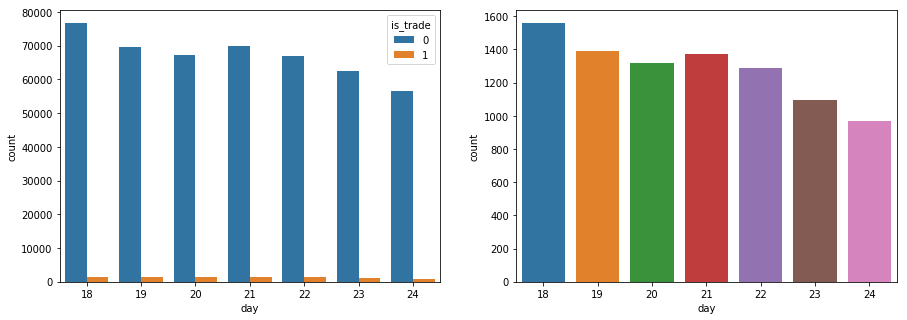

In [12]:
def seconds_convert_to_format(value):
    format = "%Y-%m-%d %H:%M:%S"
    import time
    value = time.localtime(value)
    newtime = time.strftime(format,value)
    return newtime

def timestamp_convert(train_data):
    train_data['newtime'] = train_data.context_timestamp.apply(seconds_convert_to_format)
    train_data['day'] = train_data.newtime.apply(lambda x: int(x[8:10]))
    train_data['hour'] = train_data.newtime.apply(lambda x:int(x[11:13]))
    #rain_data.drop(['context_timestamp'], axis=1, inplace=True)
    return train_data

train_data = timestamp_convert(train_data)
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x="day",hue="is_trade", data=train_data, ax=axis1)
sns.countplot(x=train_data["day"].loc[train_data["is_trade"] == 1], 
              order=[18,19,20,21,22,23,24], ax=axis2)

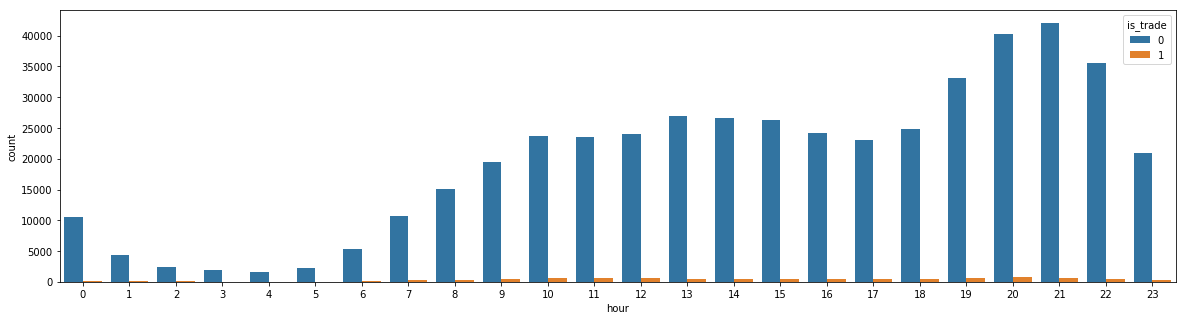

In [13]:
fig, axis1 = plt.subplots(1,1,figsize=(20,5))
sns.countplot(x="hour",hue="is_trade", data=train_data, ax=axis1)

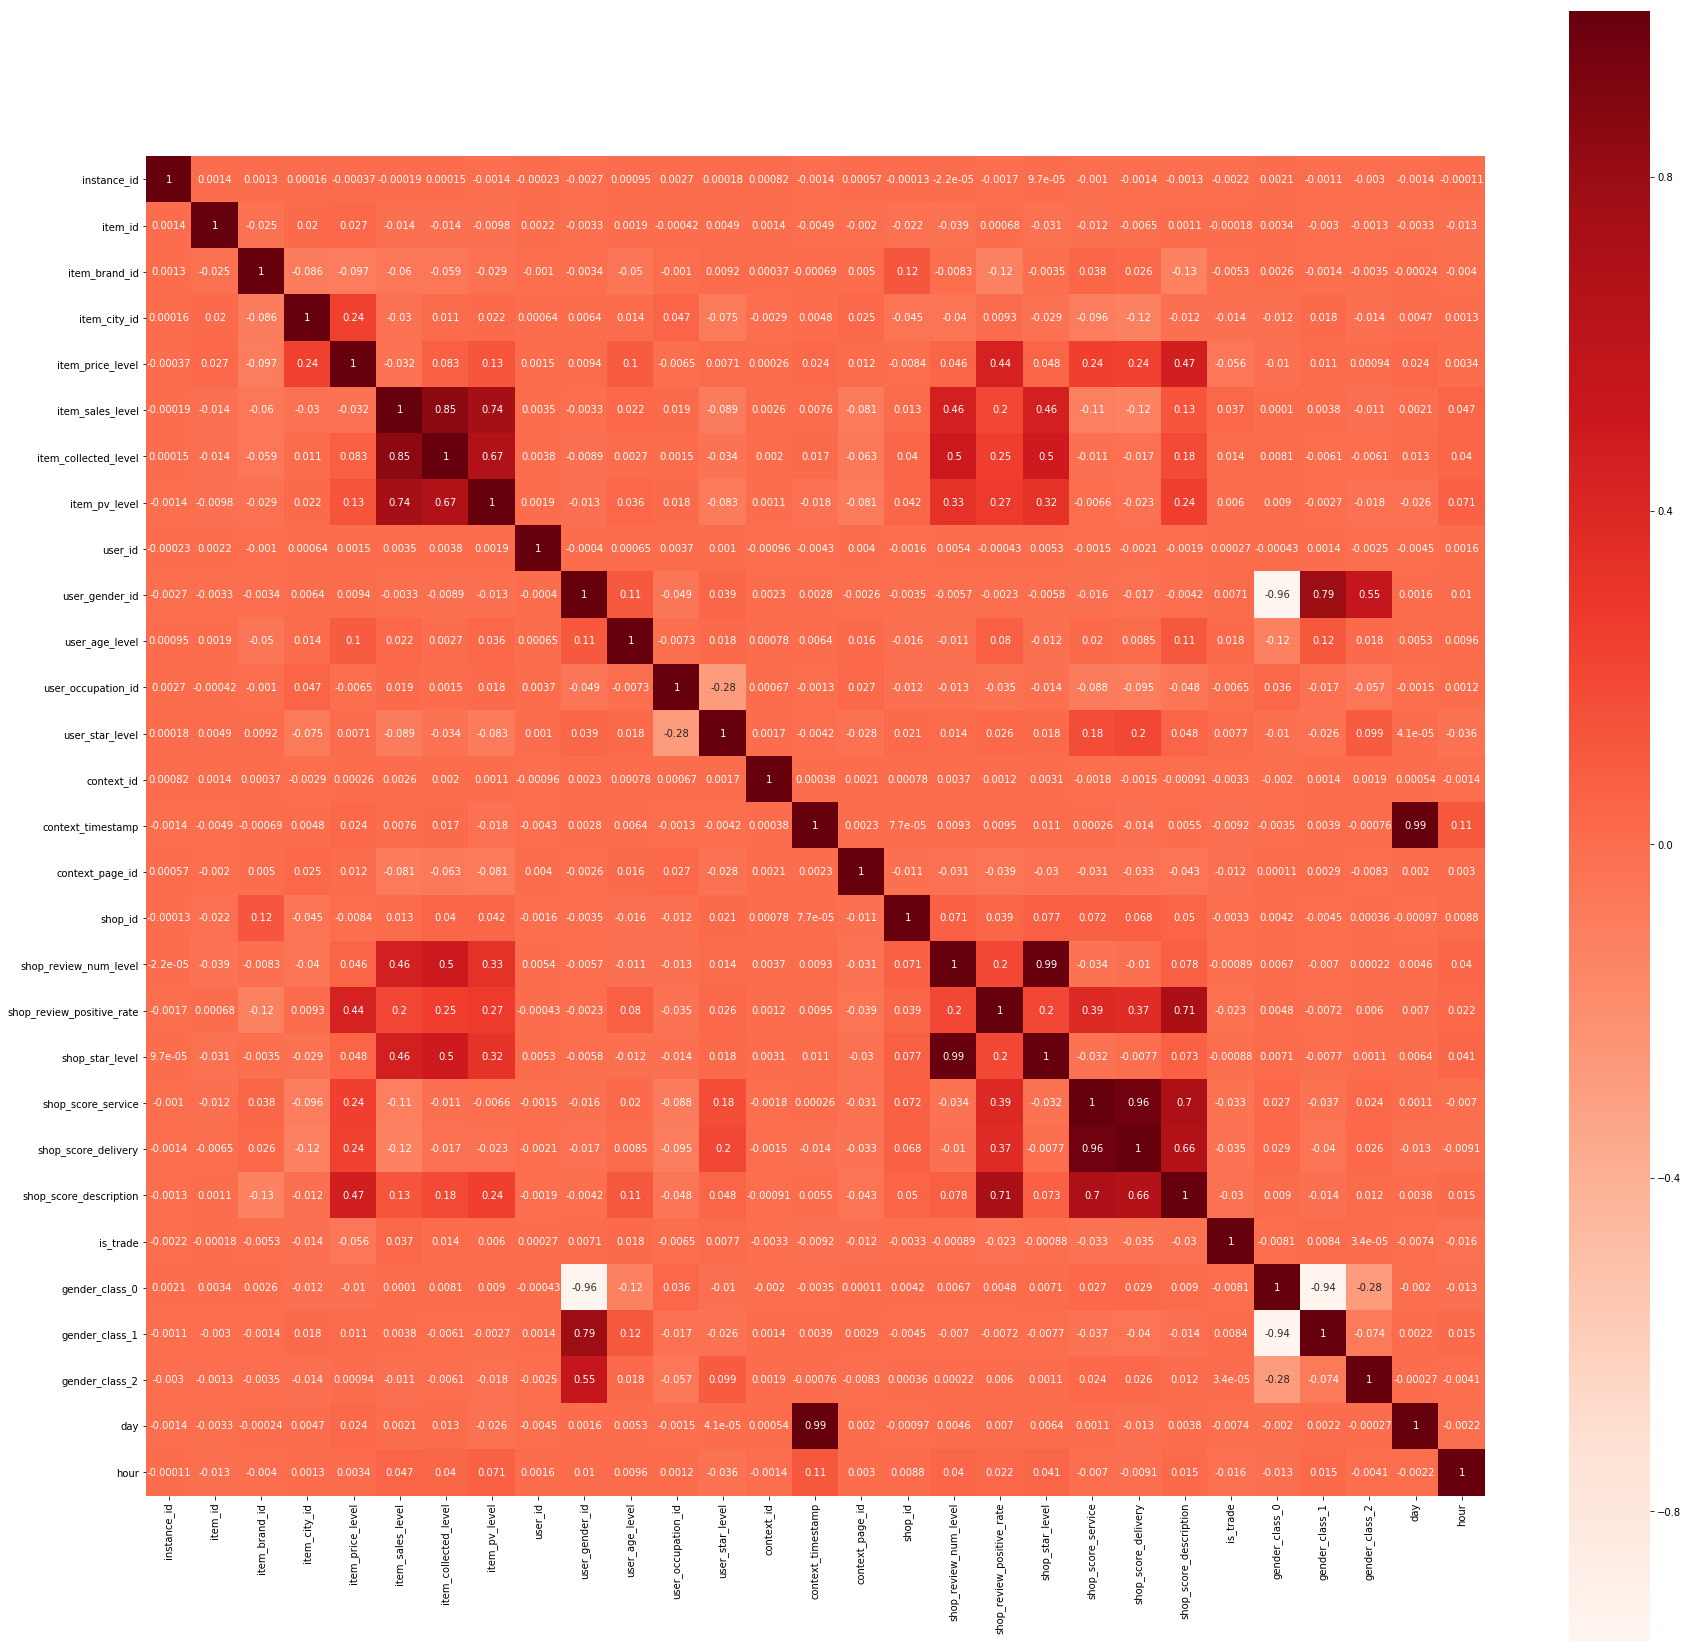

In [14]:
#def plot_heatmap():
dfdata = train_data.corr()   
plt.subplots(figsize=(30,30))
#vmax,vmin:分别是热力图的颜色取值最大和最小范围
#annot(annotate的缩写):默认取值False；如果是True，在热力图每个方格写入数据
sns.heatmap(dfdata, annot=True, vmax=1, square=True, cmap='Reds')
plt.savefig("./features_corr.png")
plt.show()

In [15]:
train_data.shape
train_data.columns.tolist()
# def choose_features():
#----------特征重要程度-----------
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.feature_selection import SelectFromModel
# features = ['context_id',
#  'context_page_id',
#  'instance_id',
#  'item_brand_id',
#  'item_city_id',
#  'item_collected_level',
#  'item_id',
#  'item_price_level',
#  'item_pv_level',
#  'shop_id',
#  'shop_review_positive_rate',
#  'shop_score_delivery',
#  'shop_score_description',
#  'shop_star_level',
#  'user_age_level',
#  'user_gender_id',
#  'user_id',]
# train_data = pd.read_csv("round1_ijcai_18_train_20180301.txt", sep=" ")
# clf = ExtraTreesClassifier()
# y = train_data.is_trade
# x = train_data.loc[:,features]
# clf = clf.fit(x,y)
# clf.feature_importances_
#model = SelectFromModel(clf,threshold='1.25*mean',prefit=True)选择特征重要性为1.25倍均值的特征
#x_trees = model.transform(x) 返回所选的特征

['instance_id',
 'item_id',
 'item_category_list',
 'item_property_list',
 'item_brand_id',
 'item_city_id',
 'item_price_level',
 'item_sales_level',
 'item_collected_level',
 'item_pv_level',
 'user_id',
 'user_gender_id',
 'user_age_level',
 'user_occupation_id',
 'user_star_level',
 'context_id',
 'context_timestamp',
 'context_page_id',
 'predict_category_property',
 'shop_id',
 'shop_review_num_level',
 'shop_review_positive_rate',
 'shop_star_level',
 'shop_score_service',
 'shop_score_delivery',
 'shop_score_description',
 'is_trade',
 'gender_class_0',
 'gender_class_1',
 'gender_class_2',
 'newtime',
 'day',
 'hour']

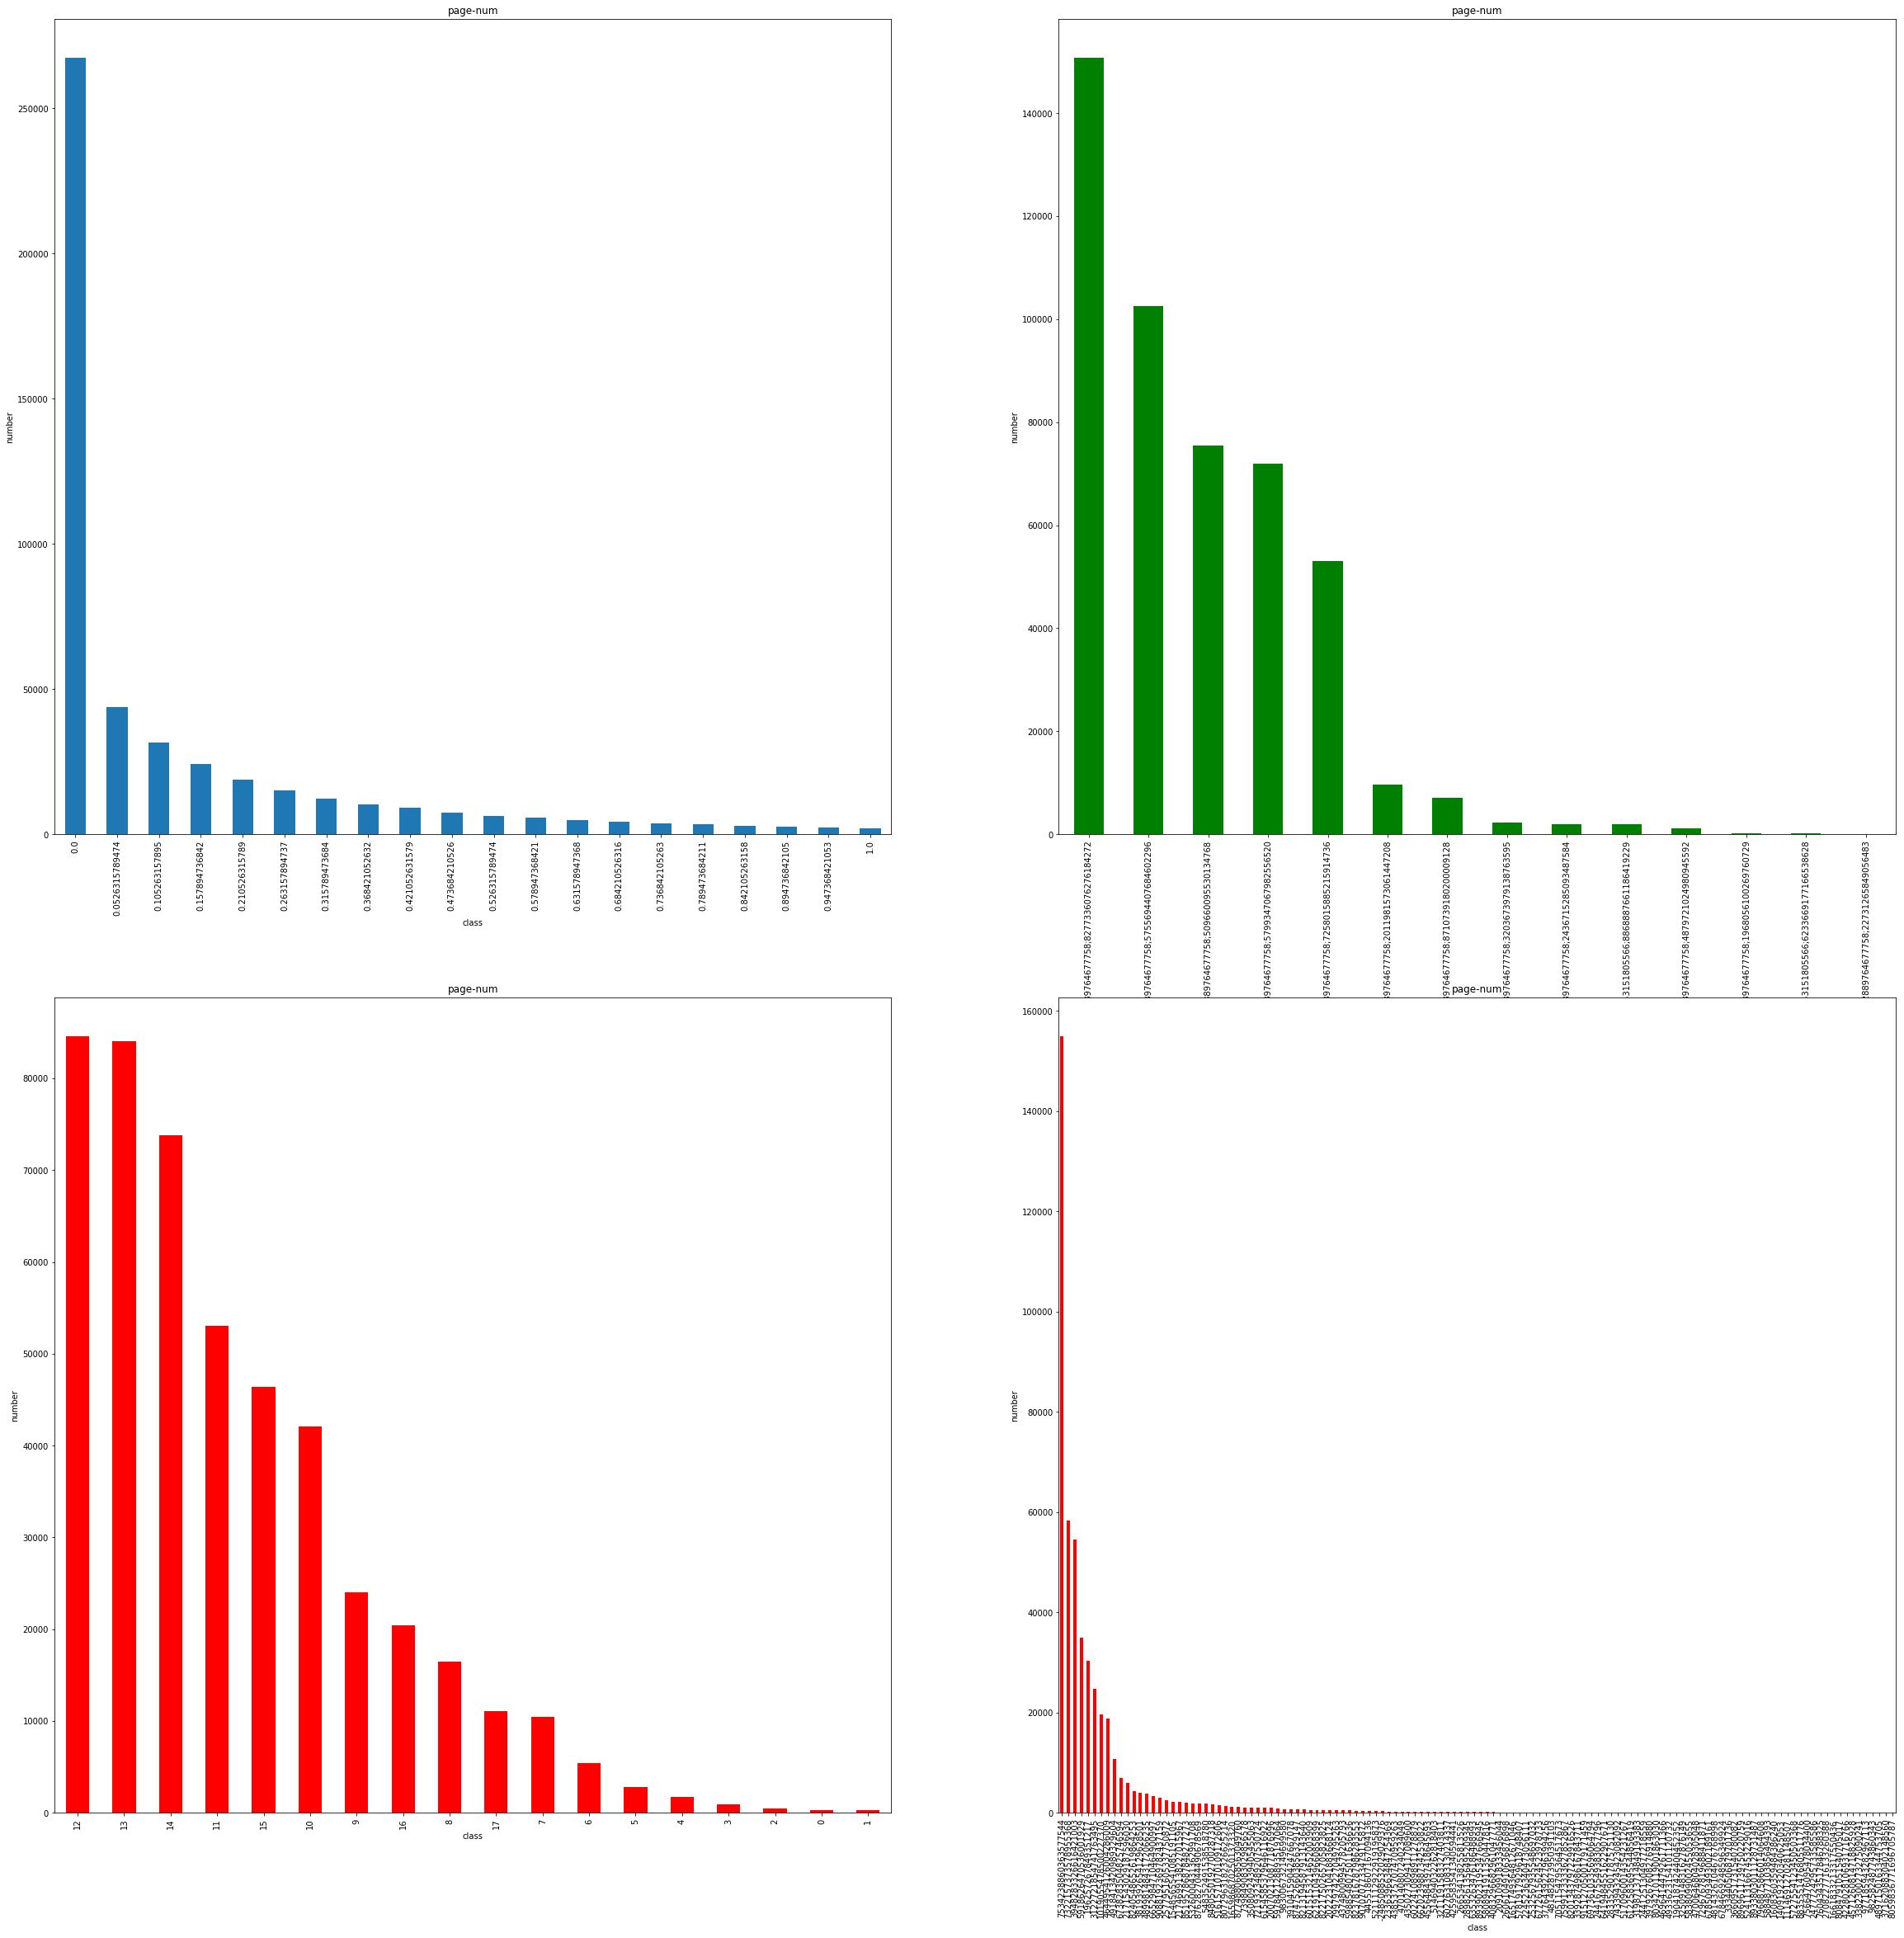

In [17]:
fig = plt.figure(figsize=(40,40))
fig.set(alpha=0.2)

plt.subplot2grid((2,2),(0,0))
train_data.context_page_id.value_counts().plot(kind='bar')
#print(all_data_process.context_page_id.value_counts())
plt.title('page-num')
plt.xlabel('class')
plt.ylabel('number')

plt.subplot2grid((2,2),(0,1))
train_data.item_category_list.value_counts().plot(kind='bar',color='green')
#print(all_data_process.item_category_list.value_counts())
plt.title('page-num')
plt.xlabel('class')
plt.ylabel('number')

plt.subplot2grid((2,2),(1,0))
train_data.item_collected_level.value_counts().plot(kind='bar',color='red')
#print(all_data_process.item_collected_level.value_counts())
plt.title('page-num')
plt.xlabel('class')
plt.ylabel('number')

plt.subplot2grid((2,2),(1,1))
train_data.item_city_id.value_counts().plot(kind='bar',color='red')
plt.savefig("./feature0.png")
#print(all_data_process.item_city_id.value_counts())
plt.title('page-num')
plt.xlabel('class')
plt.ylabel('number')
plt.show()